<a href="https://colab.research.google.com/github/sophiehsu0213/Sciencefair2021DogBreedIdentify/blob/main/PetIdentifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet', 
    input_shape=(224, 224, 3),
    include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [2]:
base_model.trainable = False

In [3]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        samplewise_center=True, 
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

In [7]:
train_it = datagen.flow_from_directory('/content/drive/MyDrive/TeachableMachineDataSets/2/train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/TeachableMachineDataSets/2/valid', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 134 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# New Section

In [8]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 37s 2s/step - loss: 0.9981 - binary_accuracy: 0.7447 - val_loss: 0.8457 - val_binary_accuracy: 0.6250
Epoch 2/20
12/12 [==============================] - 7s 597ms/step - loss: 0.4144 - binary_accuracy: 0.8511 - val_loss: 0.2785 - val_binary_accuracy: 0.8750
Epoch 3/20
12/12 [==============================] - 4s 308ms/step - loss: 0.3306 - binary_accuracy: 0.8936 - val_loss: 0.3111 - val_binary_accuracy: 0.8125
Epoch 4/20
12/12 [==============================] - 3s 232ms/step - loss: 0.1659 - binary_accuracy: 0.9271 - val_loss: 0.2505 - val_binary_accuracy: 0.9062
Epoch 5/20
12/12 [==============================] - 3s 231ms/step - loss: 0.2311 - binary_accuracy: 0.9362 - val_loss: 0.1254 - val_binary_accuracy: 0.9375
Epoch 6/20
12/12 [==============================] - 3s 232ms/step - loss: 0.1829 - binary_accuracy: 0.9362 - val_loss: 0.0699 - val_binary_accuracy: 0.9688
Epoch 7/20
12/12 [==============================] - 3s 235ms/step 

In [9]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001), 
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [10]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 9s 432ms/step - loss: 0.0643 - binary_accuracy: 0.9896 - val_loss: 0.0315 - val_binary_accuracy: 0.9688
Epoch 2/10
12/12 [==============================] - 6s 549ms/step - loss: 0.0461 - binary_accuracy: 0.9681 - val_loss: 0.0139 - val_binary_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 5s 402ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.0034 - val_binary_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 5s 402ms/step - loss: 1.9165e-04 - binary_accuracy: 1.0000 - val_loss: 0.0121 - val_binary_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 5s 401ms/step - loss: 0.0418 - binary_accuracy: 0.9787 - val_loss: 0.0154 - val_binary_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 5s 399ms/step - loss: 3.5080e-04 - binary_accuracy: 1.0000 - val_loss: 0.0275 - val_binary_accuracy: 0.9688
Epoch 7/10
12/12 [==============================] - 5s 3

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

In [12]:
def IsThisTarget(image_path):
    preds = make_predictions(image_path)
    if preds[0] > 0:
        print("Yes! Target Found.")
        print(preds[0])
    else:
        print("Not Target")
        print(preds[0])
        

Not Target
[-34.505146]


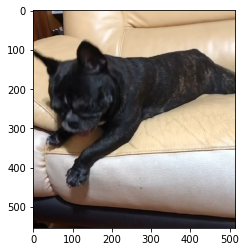

In [13]:
IsThisTarget('/content/drive/MyDrive/TeachableMachineDataSets/FinalTest/Target/891981.png')

Not Target
[-15.290972]


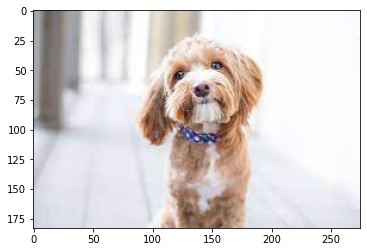

In [14]:
IsThisTarget('/content/drive/MyDrive/TeachableMachineDataSets/FinalTest/Not Target/dog1.jpg')

Yes! Target Found.
[4.964481]


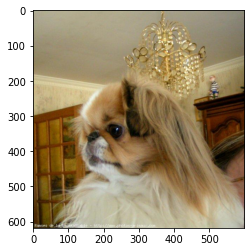

In [15]:
IsThisTarget('/content/drive/MyDrive/TeachableMachineDataSets/FinalTest/Target_1/n02085782_940.jpg')